In [1]:
from src.models.llm_interface_2 import LLMInterface_2
from src.experiments.experiment_runner import run_full_experiment_multi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/opt/anaconda3/envs/llm-bayes/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
conversation_history = (
    "We've been discussing literary styles and historical contexts in literature."
)
candidate_classes = [
    " Mark Twain.",
    " Oscar Wilde.",
    " Charles Dickens.",
]
evidence_list = [
    " works that bring out the contemporary social conventions and mores of its time rather than"
    " focusing on poetic richness and dramatic performance."
]
class_elicitation = " My favourite author is"
evidence_elicitation = " I prefer reading"

In [3]:
llms = [
    LLMInterface_2(model_name="gpt2", backend="local"),
    LLMInterface_2(model_name="gpt2-medium", backend="local"),
    LLMInterface_2(model_name="gpt2-large", backend="local"),
    LLMInterface_2(model_name="gpt2-xl", backend="local"),
]

In [9]:
# All candidate classes should have the same number of tokens
[llms[0].tokenizer.tokenize(candidate_class) for candidate_class in candidate_classes]

[['ĠMark', 'ĠTwain', '.'],
 ['ĠOscar', 'ĠWilde', '.'],
 ['ĠCharles', 'ĠDickens', '.']]

In [5]:
experiment_results = [
    run_full_experiment_multi(
        conversation_history,
        candidate_classes,
        evidence_list,
        class_elicitation,
        evidence_elicitation,
        llm,
) for llm in llms
]


--- Results for Pair:  Mark Twain. vs.  Oscar Wilde. ---
Prior probability for  Mark Twain.: 5.0862e-04
Prior probability for  Oscar Wilde.: 1.5957e-04
Prior ratio: 3.1873e+00
Likelihood for  Mark Twain.: 2.0272e-43
Likelihood for  Oscar Wilde.: 4.7200e-43
Likelihood ratio: 4.2950e-01
Posterior probability for  Mark Twain.: 3.0240e-04
Posterior probability for  Oscar Wilde.: 1.1564e-04
Posterior ratio: 2.6150e+00
Bayesian Consistency Error (BCE): 6.4721e-01

--- Results for Pair:  Mark Twain. vs.  Charles Dickens. ---
Prior probability for  Mark Twain.: 5.0862e-04
Prior probability for  Charles Dickens.: 1.3668e-03
Prior ratio: 3.7213e-01
Likelihood for  Mark Twain.: 2.0272e-43
Likelihood for  Charles Dickens.: 1.5212e-43
Likelihood ratio: 1.3327e+00
Posterior probability for  Mark Twain.: 3.0240e-04
Posterior probability for  Charles Dickens.: 7.0646e-04
Posterior ratio: 4.2804e-01
Bayesian Consistency Error (BCE): 1.4719e-01

--- Results for Pair:  Oscar Wilde. vs.  Charles Dickens.

In [6]:
experiment_results

[{(' Mark Twain.',
   ' Oscar Wilde.',
   ' works that bring out the contemporary social conventions and mores of its time rather than focusing on poetic richness and dramatic performance.'): {'prior_c1': 0.0005086151072022995,
   'prior_c2': 0.00015957305967435542,
   'evidence_likelihood_c1': 2.027222614911997e-43,
   'evidence_likelihood_c2': 4.719992407007161e-43,
   'posterior_c1': 0.00030239609743726927,
   'posterior_c2': 0.00011563987026712194,
   'BCE': 0.6472077639773488,
   'prompts': {'prior_prompt': "We've been discussing literary styles and historical contexts in literature. My favourite author is",
    'likelihood_prompt_c1': "We've been discussing literary styles and historical contexts in literature. My favourite author is Mark Twain. I prefer reading",
    'likelihood_prompt_c2': "We've been discussing literary styles and historical contexts in literature. My favourite author is Oscar Wilde. I prefer reading",
    'posterior_prompt': "We've been discussing literary st

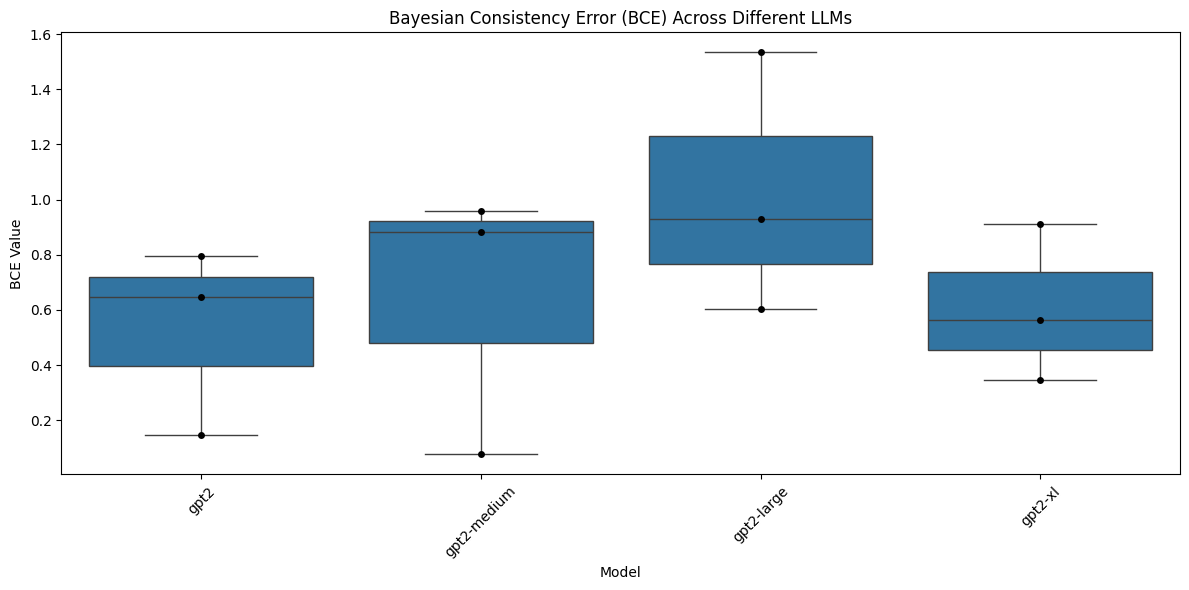


Summary Statistics:
                 mean       std       min       max
model                                              
gpt2         0.529600  0.339254  0.147192  0.794400
gpt2-large   1.022461  0.471437  0.604874  1.533692
gpt2-medium  0.640172  0.489580  0.076585  0.960258
gpt2-xl      0.607137  0.284099  0.347666  0.910706


In [7]:
all_results = []
for i, model_result in enumerate(experiment_results):
    model_name = llms[i].model_name  # Get the model name from the llms list
    
    # model_result is a dictionary where each key is a tuple (class1, class2, evidence)
    # and each value is a dictionary of metrics
    for pair_tuple, metrics in model_result.items():
        all_results.append({
            "model": model_name,
            "pair": f"{pair_tuple[0]} vs {pair_tuple[1]}",
            "evidence": pair_tuple[2],
            "BCE": metrics["BCE"]
        })

# Convert to DataFrame for easier plotting
results_df = pd.DataFrame(all_results)

plt.figure(figsize=(12, 6))
sns.boxplot(x="model", y="BCE", data=results_df)
plt.title("Bayesian Consistency Error (BCE) Across Different LLMs")
plt.xlabel("Model")
plt.ylabel("BCE Value")
plt.xticks(rotation=45)

# Add individual points for better visibility
sns.stripplot(x="model", y="BCE", data=results_df, color="black", alpha=1, jitter=False)

plt.tight_layout()
# plt.savefig("bce_comparison_boxplot.png")
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
summary = results_df.groupby("model")["BCE"].agg(["mean", "std", "min", "max"])
print(summary)

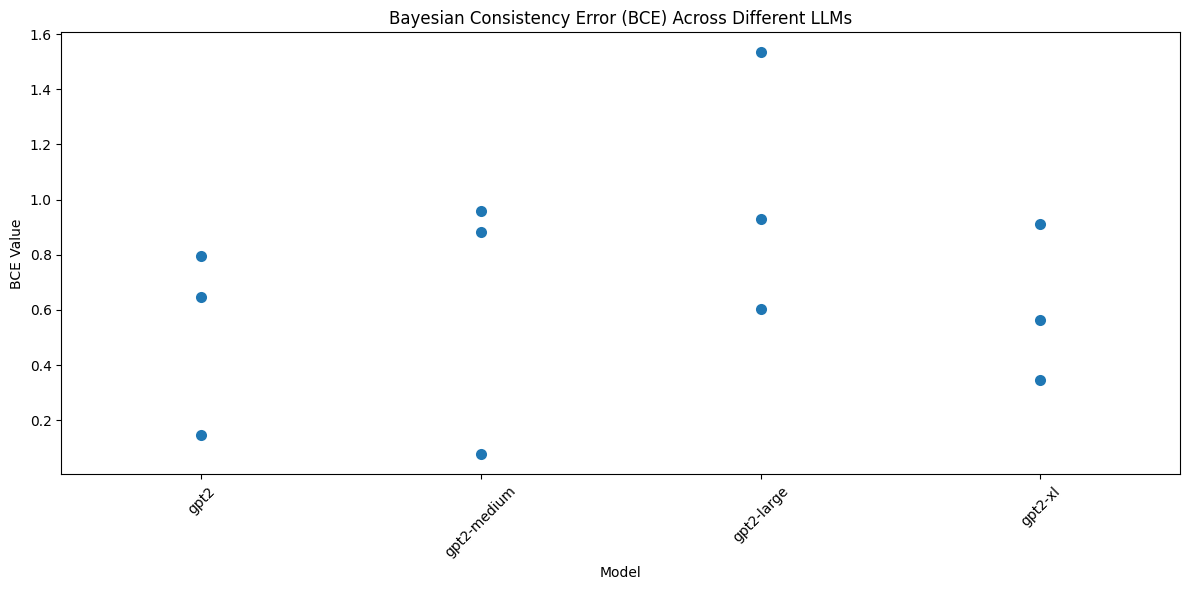

In [8]:
# Create swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x="model", y="BCE", data=results_df, size=8)
plt.title("Bayesian Consistency Error (BCE) Across Different LLMs")
plt.xlabel("Model")
plt.ylabel("BCE Value")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("bce_comparison_swarmplot.png")
plt.show()